# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [53]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [6]:
df = pd.read_csv('data/nndb_flat.csv')
df

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [17]:
df_num = df.iloc[:,7:]
df_num.reset_index(drop=True)
df_num

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [4]:
df.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


In [18]:
df_num.corr()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
Energy_kcal,1.000000,0.110302,0.806795,0.487096,0.313151,0.197338,0.026329,0.121872,-0.012292,-0.033495,...,0.145936,0.174991,0.155830,0.187439,0.123571,0.099513,0.255880,0.195181,0.056673,0.112766
Protein_g,0.110302,1.000000,0.054715,-0.301974,-0.266170,-0.072777,0.026483,0.228485,0.245423,-0.066456,...,0.008939,0.376939,0.202480,0.098360,0.046888,0.158900,0.218611,0.444608,0.378369,0.416315
Fat_g,0.806795,0.054715,1.000000,-0.054116,-0.001962,-0.028842,0.024379,-0.046950,-0.020786,-0.059993,...,-0.058049,-0.022671,-0.036286,-0.005785,0.015039,0.042765,0.070781,0.066086,0.037559,0.028264
Carb_g,0.487096,-0.301974,-0.054116,1.000000,0.615344,0.458192,0.001871,0.195571,-0.094636,0.076745,...,0.325170,0.173285,0.232408,0.281809,0.189106,0.062106,0.287207,0.073180,-0.114600,-0.012187
Sugar_g,0.313151,-0.266170,-0.001962,0.615344,1.000000,0.115916,0.010143,0.088767,-0.050450,0.064152,...,0.161257,0.034378,0.125225,0.097751,0.129540,-0.005837,0.041308,-0.049784,-0.123708,-0.021991
Fiber_g,0.197338,-0.072777,-0.028842,0.458192,0.115916,1.000000,0.005910,0.242804,-0.052045,0.081852,...,0.249075,0.135257,0.157703,0.205211,0.232286,0.185044,0.542038,0.158422,-0.035897,0.085154
VitA_mcg,0.026329,0.026483,0.024379,0.001871,0.010143,0.005910,1.000000,0.136605,0.581004,0.111279,...,0.108517,0.151679,0.325709,0.052921,0.034822,0.569945,0.024572,0.055814,0.048043,0.070541
VitB6_mg,0.121872,0.228485,-0.046950,0.195571,0.088767,0.242804,0.136605,1.000000,0.264325,0.271305,...,0.550087,0.714143,0.581678,0.417011,0.177268,0.116326,0.293169,0.213395,0.109004,0.447143
VitB12_mcg,-0.012292,0.245423,-0.020786,-0.094636,-0.050450,-0.052045,0.581004,0.264325,1.000000,0.007264,...,0.158483,0.279033,0.436182,0.099601,0.011715,0.570642,0.004124,0.148774,0.215308,0.298136
VitC_mg,-0.033495,-0.066456,-0.059993,0.076745,0.064152,0.081852,0.111279,0.271305,0.007264,1.000000,...,0.072797,0.209107,0.225928,0.056987,0.111825,0.025460,0.115222,0.012000,-0.035218,0.018476


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

<Axes: >

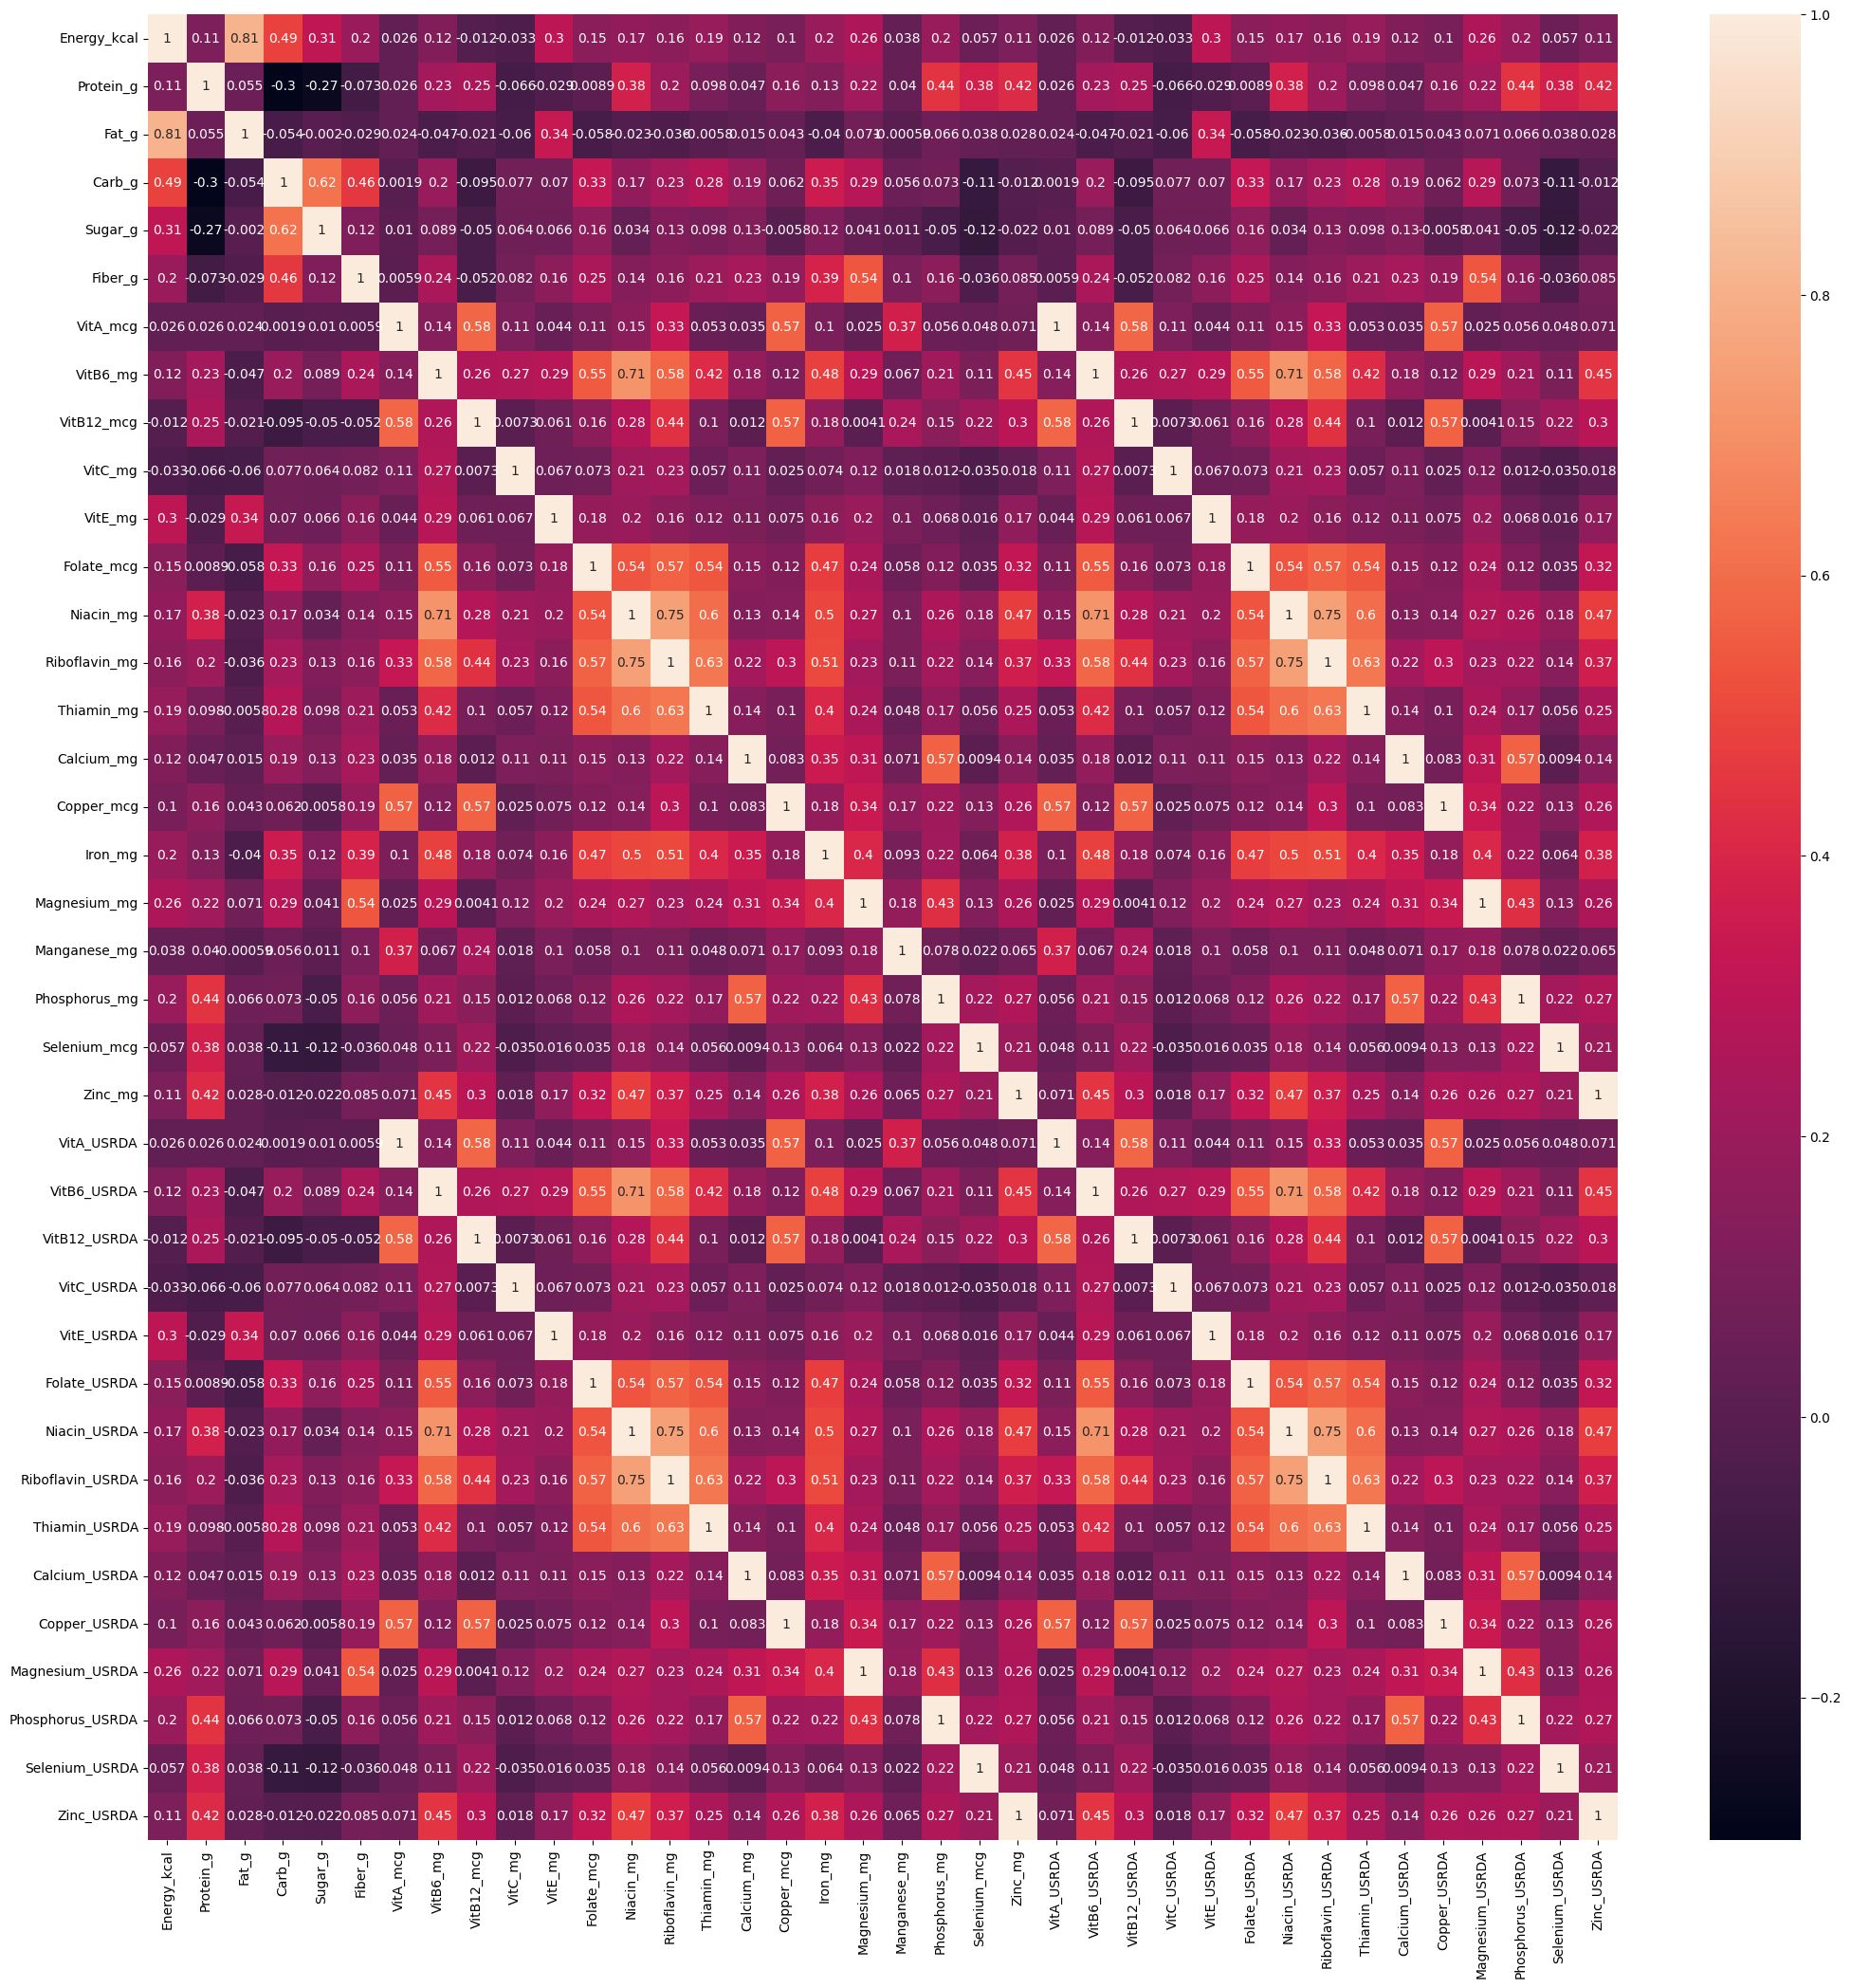

In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(df_num.corr(), annot = True)

In [24]:
# ¿Cuántas columnas contienen 'USRDA'?
# df_num.columns.isin["USRDA"]

# Crear una lista de columnas que contienen 'USRDA'
columns_with_usrda = [col for col in df_num.columns if 'USRDA' in col]

# Contar el número de columnas que contienen 'USRDA'
num_columns_with_usrda = len(columns_with_usrda)

print(num_columns_with_usrda)

15


In [25]:
df_num.columns

Index(['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g',
       'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg',
       'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg',
       'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [51]:
# dropea las columnas que contengan 'USRDA'

### Variables no numéricas
Elimina las variables de texto del dataset

In [26]:
# revisa los tipos del dataset resultante
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [27]:
# elimina las variables de texto
df_num

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables
Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

Podemos realizar una transformación Logarítmica

Nota: Como tenemos muchos ceros en nuestro df, podemos sumarle 1 para evitar este problema (indeterminación, infinito).

(df = df + 1)

In [30]:
#transformación logarítmica a esas columnas anteriores

for col in df_num:
    desplaza = 0 
    if df_num[col].min() <= 0:
        desplaza = int(abs(df_num[col].min())) + 1
    df_num[col] = np.log(df[col] + desplaza)
    df_num[col] = np.log(df[col] + desplaza)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

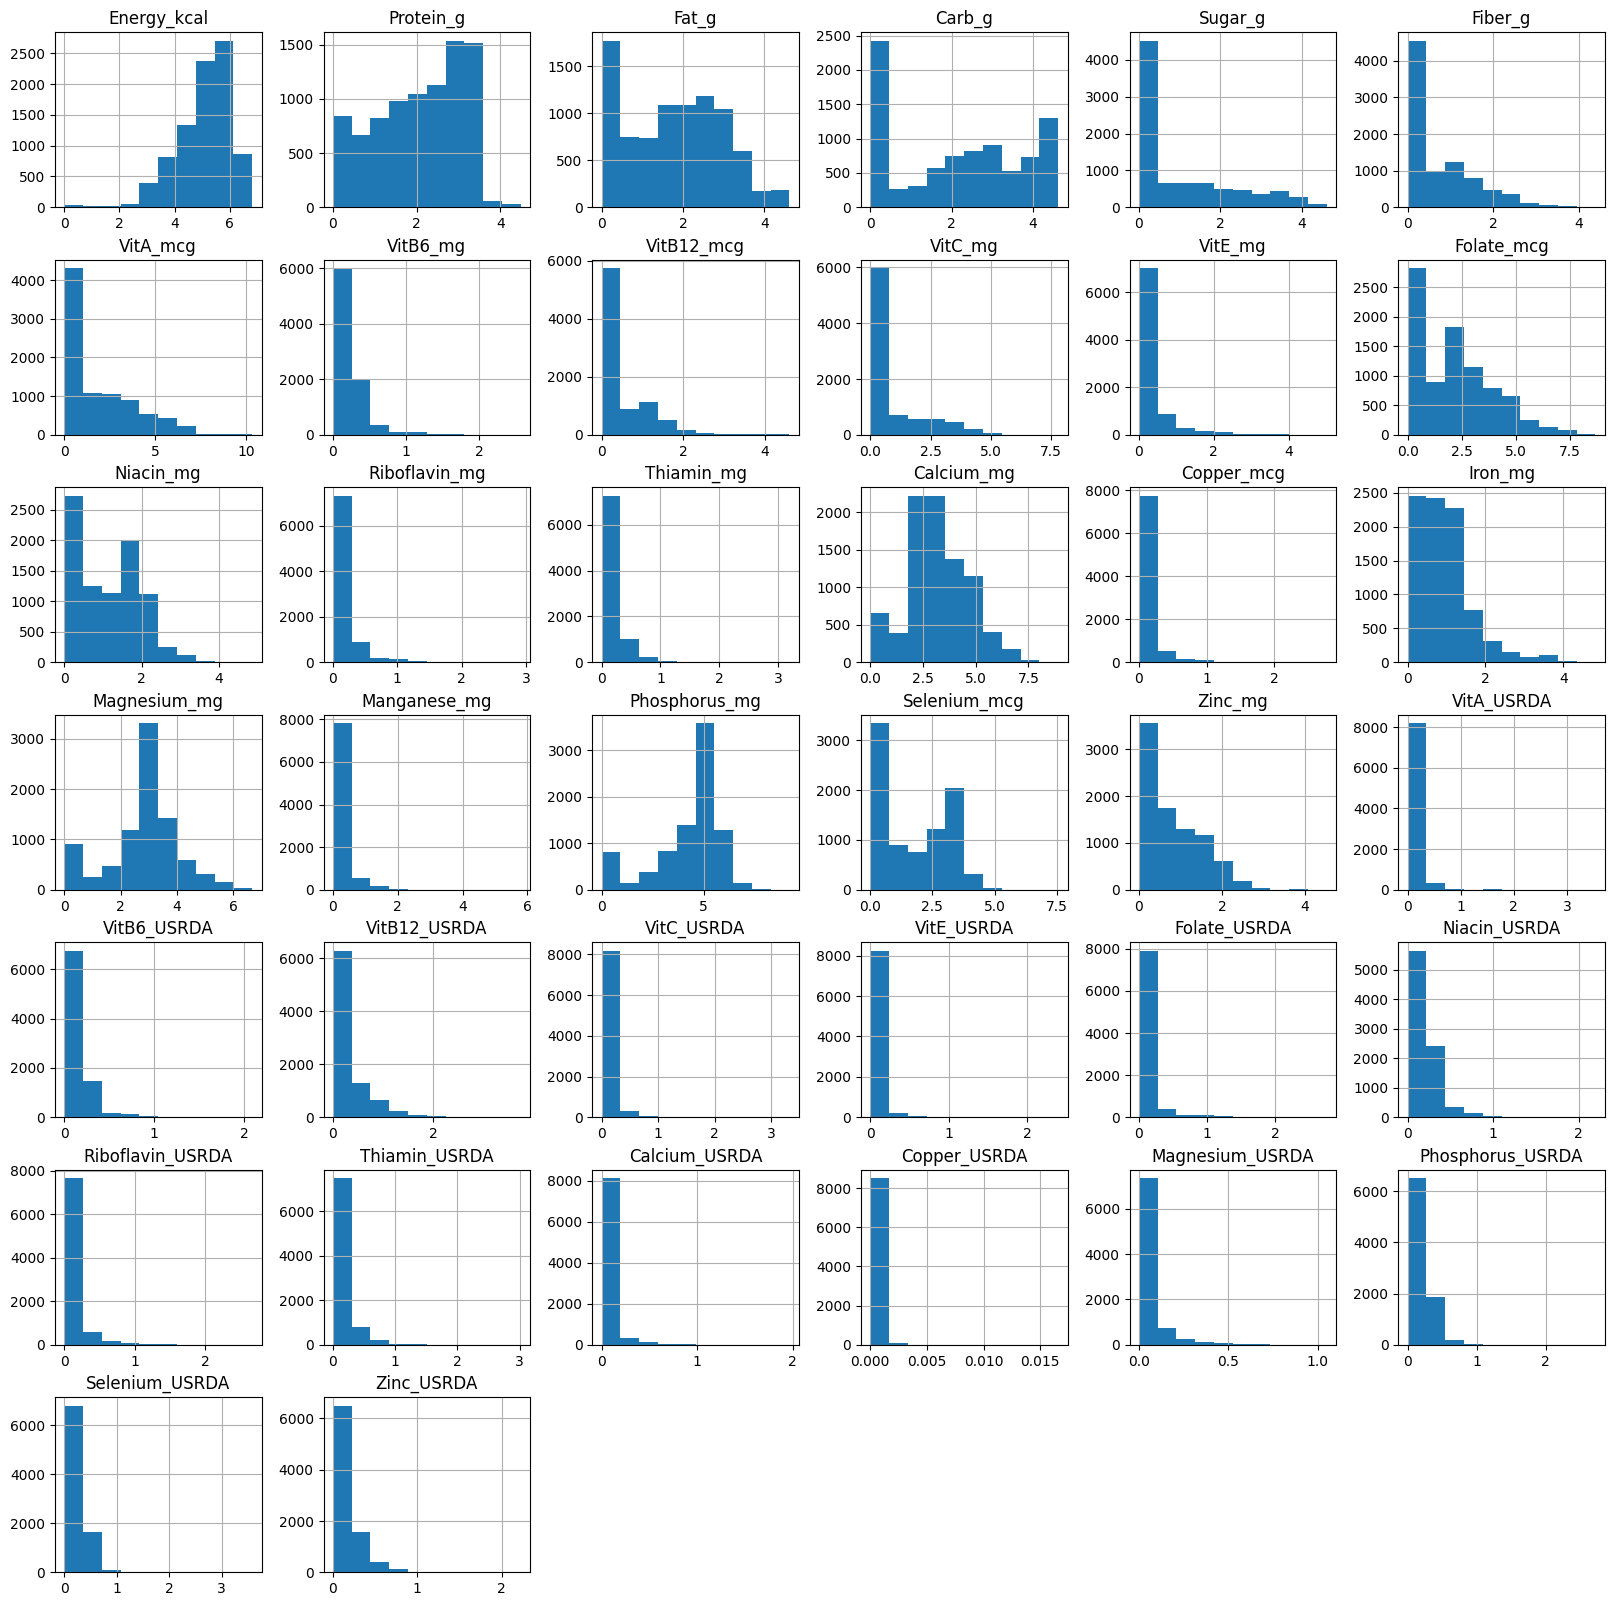

In [31]:
df_num.hist(figsize = (20,20))
plt.tight_layout

In [46]:
scaler = StandardScaler()
# Ajustar y transformar el DataFrame
df_num_scaled = scaler.fit_transform(df_num)

# Crear un nuevo DataFrame con los datos estandarizados
df_num_scaled = pd.DataFrame(df_num_scaled, columns=df_num.columns)

# Opcional para 
# df_num = df_num_scaled

df_num_scaled.head()


,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.453749,-0.63502,...,-0.370982,-0.908747,-0.657634,-0.662004,-0.308239,-0.312588,-0.657347,-0.935289,-0.728859,-0.767043
1,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.506894,-0.63502,...,-0.370982,-0.908747,-0.657634,-0.662004,-0.308239,-0.283509,-0.657347,-0.943791,-0.728859,-0.787228
2,1.745661,-1.728220,2.393490,-1.315522,-0.796963,-0.817818,2.463472,-0.819681,-0.678411,-0.63502,...,-0.406514,-0.921739,-0.777857,-0.678859,-0.464122,-0.310770,-0.705592,-1.116339,-0.811468,-0.807485
3,0.814824,0.980084,1.362565,-0.566664,-0.479778,-0.817818,1.758419,-0.184016,0.524785,-0.63502,...,0.003292,-0.594143,0.610310,-0.562034,2.954611,-0.239893,-0.164140,1.564362,0.261316,0.397249
4,0.865713,1.054782,1.388915,-0.488178,-0.474580,-0.817818,1.947668,-0.561485,0.552068,-0.63502,...,-0.174499,-0.883521,0.508555,-0.624284,3.722071,-0.268970,-0.141241,1.916255,0.261316,0.372659


In [36]:
# Muestra el primer array resultante, verás que tiene 23 valores para nuestras 23 columnas
print(df_num_scaled.iloc[0])

Energy_kcal         1.540414
Protein_g          -1.379699
Fat_g               2.222526
Carb_g             -1.279339
Sugar_g            -0.751381
Fiber_g            -0.817818
VitA_mcg            2.363105
VitB6_mg           -0.811366
VitB12_mcg         -0.453749
VitC_mg            -0.635020
VitE_mg             1.605421
Folate_mcg         -0.380206
Niacin_mg          -1.278047
Riboflavin_mg      -0.685619
Thiamin_mg         -0.682602
Calcium_mg          0.043491
Copper_mcg         -0.624237
Iron_mg            -1.290969
Magnesium_mg       -1.323615
Manganese_mg       -0.478294
Phosphorus_mg      -0.607193
Selenium_mcg       -0.700775
Zinc_mg            -1.026533
VitA_USRDA          2.551993
VitB6_USRDA        -0.747675
VitB12_USRDA       -0.454641
VitC_USRDA         -0.347176
VitE_USRDA          0.744101
Folate_USRDA       -0.370982
Niacin_USRDA       -0.908747
Riboflavin_USRDA   -0.657634
Thiamin_USRDA      -0.662004
Calcium_USRDA      -0.308239
Copper_USRDA       -0.312588
Magnesium_USRD

In [38]:
#para obtener el array del output
scaler = StandardScaler()

# Ajustar y transformar el DataFrame
df_num_scaled = scaler.fit_transform(df_num)

# Mostrar el primer array resultante (se corresponde con la primera fila del df)
print(df_num_scaled[0])

[ 1.54041394 -1.37969871  2.22252572 -1.27933898 -0.75138074 -0.81781776
  2.36310494 -0.81136575 -0.45374885 -0.63501951  1.60542126 -0.38020629
 -1.27804706 -0.68561875 -0.68260208  0.04349064 -0.6242369  -1.2909693
 -1.3236149  -0.47829422 -0.60719321 -0.7007746  -1.02653251  2.55199272
 -0.7476746  -0.45464082 -0.34717573  0.74410098 -0.37098224 -0.90874703
 -0.65763373 -0.66200366 -0.30823899 -0.31258755 -0.65734664 -0.93528923
 -0.72885913 -0.76704317]


In [49]:
df_num_scaled= pd.DataFrame(df_num_scaled)

df_num_scaled

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.453749,-0.63502,...,-0.370982,-0.908747,-0.657634,-0.662004,-0.308239,-0.312588,-0.657347,-0.935289,-0.728859,-0.767043
1,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.506894,-0.63502,...,-0.370982,-0.908747,-0.657634,-0.662004,-0.308239,-0.283509,-0.657347,-0.943791,-0.728859,-0.787228
2,1.745661,-1.728220,2.393490,-1.315522,-0.796963,-0.817818,2.463472,-0.819681,-0.678411,-0.63502,...,-0.406514,-0.921739,-0.777857,-0.678859,-0.464122,-0.310770,-0.705592,-1.116339,-0.811468,-0.807485
3,0.814824,0.980084,1.362565,-0.566664,-0.479778,-0.817818,1.758419,-0.184016,0.524785,-0.63502,...,0.003292,-0.594143,0.610310,-0.562034,2.954611,-0.239893,-0.164140,1.564362,0.261316,0.397249
4,0.865713,1.054782,1.388915,-0.488178,-0.474580,-0.817818,1.947668,-0.561485,0.552068,-0.63502,...,-0.174499,-0.883521,0.508555,-0.624284,3.722071,-0.268970,-0.141241,1.916255,0.261316,0.372659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,0.665317,0.848892,1.252011,-1.315522,-0.796963,-0.817818,1.062751,0.607592,3.225009,-0.63502,...,-0.231450,0.078102,-0.052689,-0.599292,0.010988,-0.130857,0.650513,0.761584,3.075496,-0.280153
8614,-0.365945,0.943039,-0.993791,-0.161868,-0.796963,-0.817818,-0.293552,-0.381569,1.059341,-0.63502,...,-0.174499,-0.575356,-0.698792,-0.632642,-0.417087,-0.252614,0.151841,1.781183,0.713250,-0.076176
8615,0.536895,-1.961806,-1.510128,1.358297,2.572113,-0.817818,-0.830974,-0.823845,-0.693613,-0.63502,...,-0.406514,-0.889485,-0.552049,-0.161682,-0.393657,-0.276240,-0.466624,-1.072746,-0.753486,-0.716899
8616,-0.578992,0.724618,-0.768799,-0.633329,-0.796963,-0.817818,0.848873,-0.314672,-0.074160,-0.63502,...,-0.335714,-0.475034,-0.315899,-0.641013,-0.417087,0.414215,4.037356,0.876558,1.041896,-0.326510


### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [52]:
# comprueba el shape de tu dataframe

df_num_scaled.shape

(8618, 38)

In [54]:
# Instancia un PCA sin argumentos iniciales
pca_pipe = make_pipeline(PCA()) #hemo pasado de 4 columnas a 4 columnas con PCA que NO SE PARECE EN NADA a las originales, ordenadas por importancia
pca_pipe.fit(df_num_scaled)

modelo_pca = pca_pipe['pca']

# Entrena con el df estandarizado, transforma y obtén el shape del array resultante

In [56]:
pca_pipe

Pipeline(steps=[('pca', PCA())])

In [55]:

df_num_scaled.shape

(8618, 38)

In [57]:
pca_pipe['pca'].components_ #esto son los nuevos ejes

array([[ 1.36429289e-01,  1.94350916e-01,  9.47046058e-02, ...,
         2.04595296e-01,  1.59688363e-01,  2.09609382e-01],
       [-1.16233791e-02, -2.28310401e-01, -1.26302225e-01, ...,
        -5.95781029e-02, -2.24403492e-01, -1.26430954e-01],
       [-2.10944432e-01, -1.55488323e-01, -1.81050133e-01, ...,
        -2.23385132e-01, -6.16001463e-02,  1.15106502e-02],
       ...,
       [ 7.68614973e-03, -5.04844236e-03, -9.19080013e-03, ...,
         7.88324647e-03,  1.27654578e-02, -2.37651139e-02],
       [-1.71788966e-03, -2.31097853e-04,  3.28560821e-03, ...,
         2.81785338e-03,  1.91138854e-03, -2.82403007e-03],
       [ 4.65083617e-04, -3.78087052e-04,  4.74350526e-04, ...,
         1.64182944e-04,  3.64623668e-03, -2.12059293e-03]])

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [58]:
# usa el método explained_variance_ratio y haz una suma acumulativa
modelo_pca.explained_variance_ratio_ #la primera variable explica el 62% de la variabilidad y la segunda un 24%. Con las 3 primeras tendriamos el 90% ed la variabilidad

array([3.16157279e-01, 1.37711624e-01, 8.00374027e-02, 6.33485108e-02,
       5.57447494e-02, 4.33630043e-02, 4.16104351e-02, 3.05809545e-02,
       2.45851759e-02, 2.37352999e-02, 2.10159932e-02, 1.87453609e-02,
       1.53410769e-02, 1.46628266e-02, 1.34941763e-02, 1.27655515e-02,
       1.18982602e-02, 1.02278046e-02, 9.04838029e-03, 7.78111087e-03,
       7.05986953e-03, 6.60738300e-03, 5.89590634e-03, 5.26748923e-03,
       4.35135686e-03, 4.01099659e-03, 3.79923344e-03, 2.48051795e-03,
       1.99698744e-03, 1.79977764e-03, 1.75253415e-03, 1.57895392e-03,
       8.41345856e-04, 5.44867836e-04, 1.05451346e-04, 3.71990876e-05,
       1.04905286e-05, 4.66256925e-06])

array([0.3125111 , 0.47917612, 0.56449832, 0.63561572, 0.69466103,
       0.73953892, 0.77033406, 0.79752064, 0.82289426, 0.84551716,
       0.86746341, 0.88651656, 0.90504278, 0.91936803, 0.93286501,
       0.94584362, 0.95704645, 0.96679102, 0.97608654, 0.98355611,
       0.99049601, 0.99615843, 1.        ])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.31615728 0.4538689  0.53390631 0.59725482 0.65299957 0.69636257
 0.737973   0.76855396 0.79313914 0.81687444 0.83789043 0.85663579
 0.87197687 0.88663969 0.90013387 0.91289942 0.92479768 0.93502549
 0.94407387 0.95185498 0.95891485 0.96552223 0.97141814 0.97668562
 0.98103698 0.98504798 0.98884721 0.99132773 0.99332472 0.99512449
 0.99687703 0.99845598 0.99929733 0.9998422  0.99994765 0.99998485
 0.99999534 1.        ]


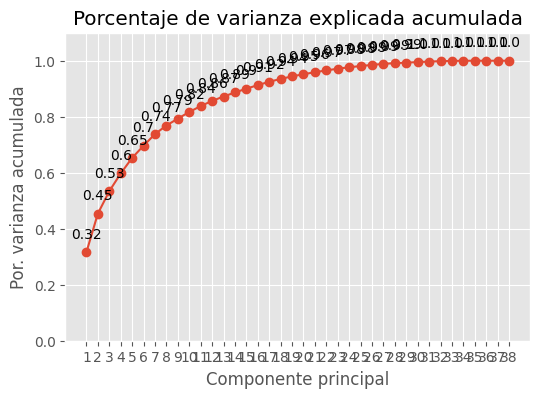

In [59]:
# plotea la suma acumulativa según el número de componentes
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df_num_scaled.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_num_scaled.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

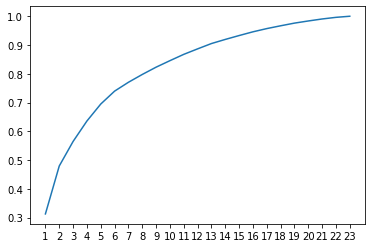

In [ ]:
# Nos quedamos con 6 PCs para casi un 80% de la varianza original

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [61]:
# Instancia un nuevo PCA con n_components=6
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=6)) #hemo pasado de 4 columnas a 4 columnas con PCA que NO SE PARECE EN NADA a las originales, ordenadas por importancia
pca_pipe.fit(df_num_scaled)

modelo_pca = pca_pipe['pca']
# Entrena, transforma y obtén el shape
modelo_pca

PCA(n_components=6)

In [63]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=6)) #COGEMOS SOLO 2 COMPONENTES
modelo_pca = pca_pipe['pca']
proyecciones = pca_pipe.fit_transform(X=df_num_scaled)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
    index   = df_num_scaled.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.823468,-0.217247,0.554230,1.156518,4.150183,-0.318278
1,-2.806940,-0.158028,0.521870,1.154344,4.140036,-0.256405
2,-3.734574,-0.155279,1.237403,0.746918,5.062025,0.558963
3,1.710788,-1.028769,-1.160104,1.804530,0.766220,-2.923251
4,1.464150,-0.870972,-1.554415,2.279018,0.968752,-3.292673


In [28]:
# Monta un dataframe con los resultado y las columnas 'PC1','PC2','PC3','PC4','PC5','PC6'

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.139032,-0.968019,-1.463961,0.270909,4.066968,0.307162
1,-2.106485,-0.909501,-1.480557,0.263270,4.032445,0.348575
2,-3.267830,-1.138430,-2.042319,1.175416,4.071752,1.326740
3,1.525964,-1.264101,0.136025,-0.929826,2.430468,-2.095023
4,1.240712,-1.204120,0.004757,-1.191985,2.691724,-2.341893


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [66]:
df

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1.932789,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1.932934,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1.933078,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1.933222,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1.933366,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,2.427271,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,2.434510,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,2.434743,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,2.434820,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [35]:
# Necesitaremos la serie FoodGroup
df

0               Dairy and Egg Products
1               Dairy and Egg Products
2               Dairy and Egg Products
3               Dairy and Egg Products
4               Dairy and Egg Products
                     ...              
8613    Finfish and Shellfish Products
8614    Finfish and Shellfish Products
8615                            Sweets
8616    Finfish and Shellfish Products
8617    Finfish and Shellfish Products
Name: FoodGroup, Length: 8618, dtype: object

,FoodGroup
0,Dairy and Egg Products
1,Dairy and Egg Products
2,Dairy and Egg Products
3,Dairy and Egg Products
4,Dairy and Egg Products
...,...
8613,Finfish and Shellfish Products
8614,Finfish and Shellfish Products
8615,Sweets
8616,Finfish and Shellfish Products


In [36]:
# Unimos la serie de grupos de comida (FoodGroup) con nuestro df final, prueba a hacer un merge

,FoodGroup,PC1,PC2,PC3,PC4,PC5,PC6
0,Dairy and Egg Products,-2.139032,-0.968019,-1.463961,0.270909,4.066968,0.307162
1,Dairy and Egg Products,-2.106485,-0.909501,-1.480557,0.263270,4.032445,0.348575
2,Dairy and Egg Products,-3.267830,-1.138430,-2.042319,1.175416,4.071752,1.326740
3,Dairy and Egg Products,1.525964,-1.264101,0.136025,-0.929826,2.430468,-2.095023
4,Dairy and Egg Products,1.240712,-1.204120,0.004757,-1.191985,2.691724,-2.341893


In [130]:
df_final_merged = pd.merge(food, df_pca, left_index=True, right_index=True)
# Best way

,FoodGroup,PC1,PC2,PC3,PC4,PC5,PC6
0,Dairy and Egg Products,-2.139032,-0.968019,-1.463967,0.270851,4.067039,0.306874
1,Dairy and Egg Products,-2.106485,-0.909502,-1.480567,0.263221,4.032494,0.348373
2,Dairy and Egg Products,-3.267830,-1.138430,-2.042335,1.175411,4.071730,1.326500
3,Dairy and Egg Products,1.525964,-1.264102,0.136046,-0.929817,2.430482,-2.095504
4,Dairy and Egg Products,1.240712,-1.204120,0.004784,-1.192000,2.691787,-2.342385
...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,2.553661,-2.548702,0.472283,-0.109458,2.716705,0.017503
8614,Finfish and Shellfish Products,0.075018,-1.840923,0.935789,-1.348908,-0.391982,-0.760173
8615,Sweets,-2.930529,1.664406,-1.242112,1.172462,-0.915640,-0.884892
8616,Finfish and Shellfish Products,1.118895,-0.780833,0.805093,-1.581764,1.641611,1.091033


In [ ]:
for columnName in df_final_merged[['PC1','PC2','PC3','PC4','PC5','PC6']].columns:
   df_final_merged.sort_values(by=columnName, ascending=False, inplace=True)
   print(columnName)
   print(df_final_merged['FoodGroup'][:3])
   print("-"*50)

In [132]:
# de nada :)
# for columnName in df_final_merged[['PC1','PC2','PC3','PC4','PC5','PC6']].columns:
#     df_final_merged.sort_values(by=columnName, ascending=False, inplace=True)
#     print(columnName)
#     print(df_final_merged['FoodGroup'][:3])
#     print("-"*50)

PC1
1832    Breakfast Cereals
1863    Breakfast Cereals
2025    Breakfast Cereals
Name: FoodGroup, dtype: object
--------------------------------------------------
PC2
4190                            Beverages
3577    Vegetables and Vegetable Products
3320    Vegetables and Vegetable Products
Name: FoodGroup, dtype: object
--------------------------------------------------
PC3
8537                        Beverages
4355                        Beverages
5277    Lamb, Veal, and Game Products
Name: FoodGroup, dtype: object
--------------------------------------------------
PC4
1850    Breakfast Cereals
1867    Breakfast Cereals
2025    Breakfast Cereals
Name: FoodGroup, dtype: object
--------------------------------------------------
PC5
776    Fats and Oils
632    Fats and Oils
786    Fats and Oils
Name: FoodGroup, dtype: object
--------------------------------------------------
PC6
7457    Beef Products
7458    Beef Products
4190        Beverages
Name: FoodGroup, dtype: object
----------